# 7.4 获得前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)

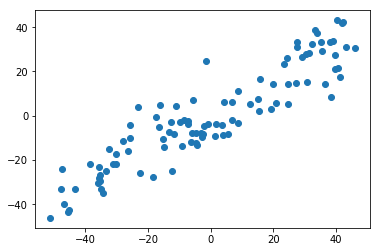

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### 7.4.1 整合第一主成分的代码

In [5]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    #初始的w转换为单位向量    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = 2
        w = w + eta * gradient
        # 注意1: 每一次求到了w向量后转化为单位向量
        w = direction(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
        
    return w

In [6]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w1 = first_component(X, initial_w, eta)
w1

array([0.78542005, 0.61896312])

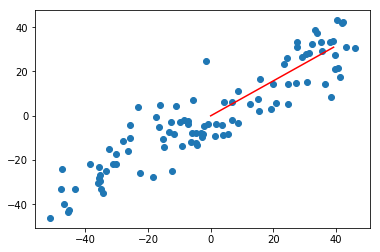

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.plot([0, w1[0]*50],[0, w1[1]*50], color='r')
plt.show()

### 7.4.2 减去第一主成分的分量, 计算第二主成分
    - 得到的样本结果，基本上与上一次的数据分布是垂直的

In [8]:
## 通过For循环来进行第一主成分的分量进行去除
# X2 = np.empty(X.shape)
# for i in range(len(X)):
#     X2[i] = X[i] - X[i].dot(w1) * w1

# 使用向量化的方法进行分量去除
X2 = X - X.dot(w1).reshape(-1, 1) * w1

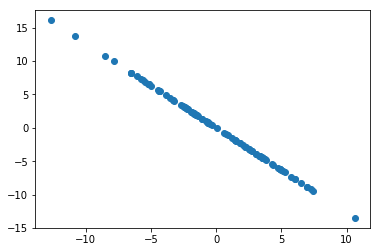

In [9]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [10]:
w2 = first_component(X2, initial_w, eta)
w2

array([ 0.61896312, -0.78542005])

In [11]:
# w1 和 w2都是单位向量，点乘的结果就是cosθ,如果结果接近0，则w1和w2是垂直的
w1.dot(w2)

1.6653345369377348e-16

### 7.4.3 计算前n个主成分

In [12]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    
    return res        

In [13]:
res = first_n_components(2, X)
res

[array([0.78542005, 0.61896312]), array([-0.61896312,  0.78542005])]

In [14]:
res[0].dot(res[1])

0.0